Random Forest Model on New Dataser

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/dataset-30k.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data.head()

,Time[s],Force[N],D2[mm],S2,D3[mm],S3,D4[mm],S4,D5[mm],S5,...,D10[mm],S10,D11[mm],S11,D12[mm],S12,D13[mm],S13,D14[mm],S14
0,0.000006,118.38,-3.018900e-13,-3.310197e-17,3.488500e-12,3.825110e-16,-3.988400e-11,-4.373246e-15,4.559300e-10,4.999232e-14,...,3.489300e-12,3.825987e-16,-3.988400e-11,-4.373246e-15,4.559300e-10,4.999232e-14,-5.212000e-09,-5.714912e-13,5.958000e-08,6.532895e-12
1,0.000012,236.78,-1.667200e-12,-1.828070e-16,1.927400e-11,2.113377e-15,-2.204700e-10,-2.417434e-14,2.521500e-09,2.764803e-13,...,1.927900e-11,2.113925e-15,-2.204700e-10,-2.417434e-14,2.521500e-09,2.764803e-13,-2.883800e-08,-3.162061e-12,3.298100e-07,3.616338e-11
2,0.000018,355.20,-5.024800e-12,-5.509649e-16,5.813500e-11,6.374452e-15,-6.654600e-10,-7.296711e-14,7.616400e-09,8.351316e-13,...,5.814800e-11,6.375877e-15,-6.654600e-10,-7.296711e-14,7.616400e-09,8.351316e-13,-8.717200e-08,-9.558333e-12,9.977100e-07,1.093980e-10
3,0.000024,473.63,-1.130400e-11,-1.239474e-15,1.309100e-10,1.435417e-14,-1.500000e-09,-1.644737e-13,1.718500e-08,1.884320e-12,...,1.309400e-10,1.435746e-14,-1.500000e-09,-1.644737e-13,1.718500e-08,1.884320e-12,-1.968900e-07,-2.158882e-11,2.255700e-06,2.473355e-10
4,0.000030,592.08,-2.141000e-11,-2.347588e-15,2.482600e-10,2.722149e-14,-2.848300e-09,-3.123136e-13,3.267500e-08,3.582785e-12,...,2.483200e-10,2.722807e-14,-2.848300e-09,-3.123136e-13,3.267500e-08,3.582785e-12,-3.748200e-07,-4.109868e-11,4.299700e-06,4.714583e-10


In [ ]:
# Separate input features (time, force) and output variables (stress for 14 nodes and deformation for 14 nodes)
X = data[['Time[s]', 'Force[N]']]

# Output variables: Stress (S1 to S14) and Deformation (D1 to D14)
stress_columns = [f'S{i}' for i in range(2, 15)]  # S1 to S14
deformation_columns = [f'D{i}[mm]' for i in range(2, 15)]  # D1(mm) to D14(mm)

y_stress = data[stress_columns]
y_deformation = data[deformation_columns]

In [ ]:
# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train_stress, y_test_stress = train_test_split(X_scaled, y_stress, test_size=0.3, random_state=42)
_, _, y_train_deformation, y_test_deformation = train_test_split(X_scaled, y_deformation, test_size=0.3, random_state=42)


In [ ]:
# Define the Random Forest Regressor model and parameters for GridSearch
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [70, 100, 120, 150],
    'max_depth': [10, 20, 30, 40, 50]
}

In [ ]:
# Perform GridSearch to find the best parameters for stress prediction
grid_search_stress = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_stress.fit(X_train, y_train_stress)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [70, 100, 120, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Perform GridSearch to find the best parameters for deformation prediction
grid_search_deformation = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_deformation.fit(X_train, y_train_deformation)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [70, 100, 120, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Extract and print the best parameters for the stress model
best_params_stress = grid_search_stress.best_params_
print(f"Best parameters for Stress: {best_params_stress}")

# Extract and print the best parameters for the deformation model
best_params_deformation = grid_search_deformation.best_params_
print(f"Best parameters for Deformation: {best_params_deformation}")


Best parameters for Stress: {'max_depth': 40, 'n_estimators': 150}
Best parameters for Deformation: {'max_depth': 40, 'n_estimators': 120}


In [ ]:
rf_best_stress = RandomForestRegressor(n_estimators=best_params_stress['n_estimators'], max_depth=best_params_stress['max_depth'])
rf_best_stress.fit(X_train, y_train_stress)

rf_best_deformation = RandomForestRegressor(n_estimators=best_params_deformation['n_estimators'], max_depth=best_params_deformation['max_depth'])
rf_best_deformation.fit(X_train, y_train_deformation)

RandomForestRegressor(max_depth=40, n_estimators=120)

In [ ]:
# Make predictions on the test set
y_pred_stress = rf_best_stress.predict(X_test)
y_pred_deformation = rf_best_deformation.predict(X_test)

In [ ]:
# Evaluate model performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [ ]:
# Stress performance metrics for each node
for i in range(13):
    mse_stress, rmse_stress, mae_stress, r2_stress = evaluate_model(y_test_stress.iloc[:, i], y_pred_stress[:, i])
    print(f'Stress Node {i+1} - MSE: {mse_stress}, RMSE: {rmse_stress}, MAE: {mae_stress}, R²: {r2_stress}')

# Deformation performance metrics for each node
for i in range(13):
    mse_deformation, rmse_deformation, mae_deformation, r2_deformation = evaluate_model(y_test_deformation.iloc[:, i], y_pred_deformation[:, i])
    print(f'Deformation Node {i+1} - MSE: {mse_deformation}, RMSE: {rmse_deformation}, MAE: {mae_deformation}, R²: {r2_deformation}')


Stress Node 1 - MSE: 8.274984934627809e-13, RMSE: 9.096694418648903e-07, MAE: 5.248589490741232e-07, R²: 0.9999949075378736
Stress Node 2 - MSE: 2.378702901033587e-12, RMSE: 1.542304412570225e-06, MAE: 8.879445919737537e-07, R²: 0.9999949377603242
Stress Node 3 - MSE: 3.433268715085736e-12, RMSE: 1.852908177726499e-06, MAE: 1.0673670190902328e-06, R²: 0.999995035013057
Stress Node 4 - MSE: 3.6533971058999365e-12, RMSE: 1.911386173932399e-06, MAE: 1.1060616432086036e-06, R²: 0.9999952214169616
Stress Node 5 - MSE: 3.5198449924615264e-12, RMSE: 1.8761249938267777e-06, MAE: 1.0866155823635123e-06, R²: 0.9999953701654429
Stress Node 6 - MSE: 3.428587542577167e-12, RMSE: 1.851644550818857e-06, MAE: 1.0707826794625121e-06, R²: 0.9999954269235514
Stress Node 7 - MSE: 1.0781017936672143e-12, RMSE: 1.0383168079479471e-06, MAE: 5.964522687751175e-07, R²: 0.9999958229720528
Stress Node 8 - MSE: 9.778631118685302e-13, RMSE: 9.88869613178871e-07, MAE: 5.744526319402158e-07, R²: 0.9999959107393463
S

In [ ]:
# Overall result for stress and deformation

import numpy as np

# Initialize lists to store individual metrics for aggregation
mse_stress_list, rmse_stress_list, mae_stress_list, r2_stress_list = [], [], [], []
mse_deformation_list, rmse_deformation_list, mae_deformation_list, r2_deformation_list = [], [], [], []

# Stress performance metrics for each node
for i in range(13):
    mse_stress, rmse_stress, mae_stress, r2_stress = evaluate_model(y_test_stress.iloc[:, i], y_pred_stress[:, i])
    mse_stress_list.append(mse_stress)
    rmse_stress_list.append(rmse_stress)
    mae_stress_list.append(mae_stress)
    r2_stress_list.append(r2_stress)

# Deformation performance metrics for each node
for i in range(13):
    mse_deformation, rmse_deformation, mae_deformation, r2_deformation = evaluate_model(y_test_deformation.iloc[:, i], y_pred_deformation[:, i])
    mse_deformation_list.append(mse_deformation)
    rmse_deformation_list.append(rmse_deformation)
    mae_deformation_list.append(mae_deformation)
    r2_deformation_list.append(r2_deformation)

# Calculate overall metrics (mean of individual metrics)
overall_mse_stress = np.mean(mse_stress_list)
overall_rmse_stress = np.mean(rmse_stress_list)
overall_mae_stress = np.mean(mae_stress_list)
overall_r2_stress = np.mean(r2_stress_list)

overall_mse_deformation = np.mean(mse_deformation_list)
overall_rmse_deformation = np.mean(rmse_deformation_list)
overall_mae_deformation = np.mean(mae_deformation_list)
overall_r2_deformation = np.mean(r2_deformation_list)

# Print overall metrics
print(f'Overall Stress - MSE: {overall_mse_stress}, RMSE: {overall_rmse_stress}, MAE: {overall_mae_stress}, R²: {overall_r2_stress}')
print(f'Overall Deformation - MSE: {overall_mse_deformation}, RMSE: {overall_rmse_deformation}, MAE: {overall_mae_deformation}, R²: {overall_r2_deformation}')


Overall Stress - MSE: 3.018947868504312e-12, RMSE: 1.6640895447718027e-06, MAE: 9.638896391614297e-07, R²: 0.9999952432765002
Overall Deformation - MSE: 0.00024456524842700805, RMSE: 0.015029867835344156, MAE: 0.008777568684339373, R²: 0.9999952649674134


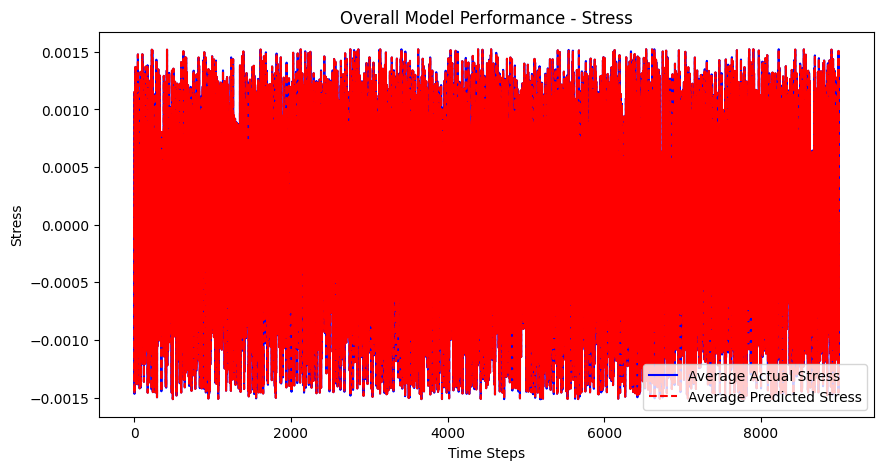

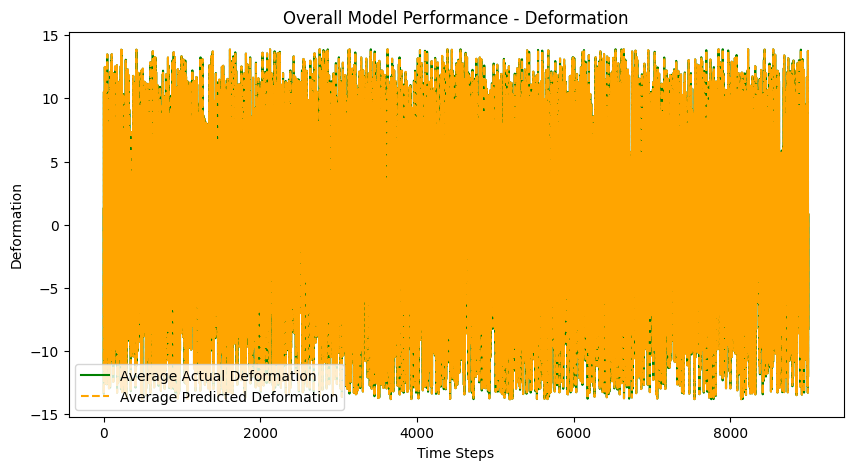

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate average actual and predicted values across all nodes
avg_actual_stress = np.mean(y_test_stress.values, axis=1)
avg_predicted_stress = np.mean(y_pred_stress, axis=1)

avg_actual_deformation = np.mean(y_test_deformation.values, axis=1)
avg_predicted_deformation = np.mean(y_pred_deformation, axis=1)

# Plot for Overall Stress Performance
plt.figure(figsize=(10, 5))
plt.plot(avg_actual_stress, label='Average Actual Stress', color='blue')
plt.plot(avg_predicted_stress, label='Average Predicted Stress', color='red', linestyle='dashed')
plt.title('Overall Model Performance - Stress')
plt.xlabel('Time Steps')
plt.ylabel('Stress')
plt.legend()
plt.show()

# Plot for Overall Deformation Performance
plt.figure(figsize=(10, 5))
plt.plot(avg_actual_deformation, label='Average Actual Deformation', color='green')
plt.plot(avg_predicted_deformation, label='Average Predicted Deformation', color='orange', linestyle='dashed')
plt.title('Overall Model Performance - Deformation')
plt.xlabel('Time Steps')
plt.ylabel('Deformation')
plt.legend()
plt.show()


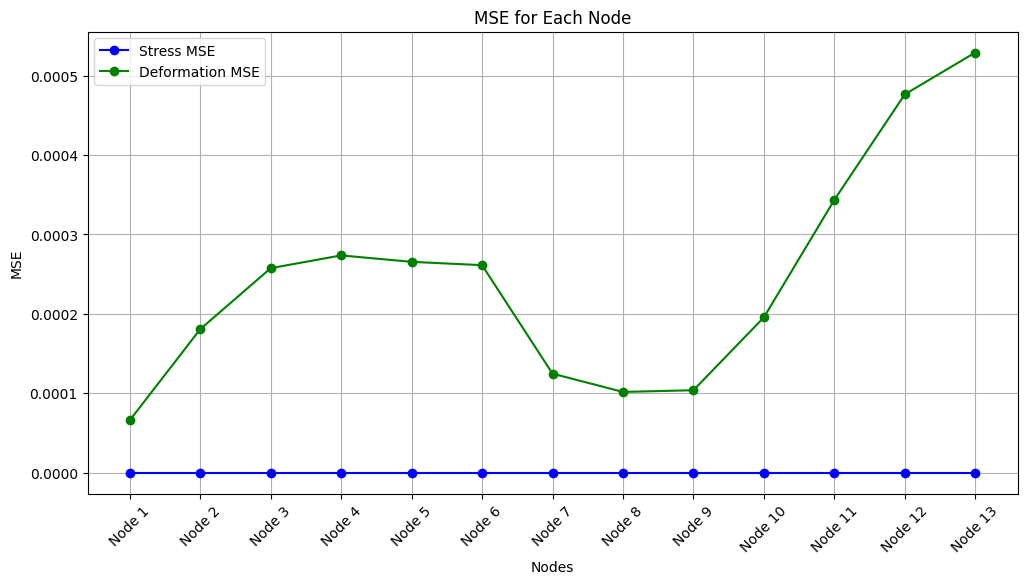

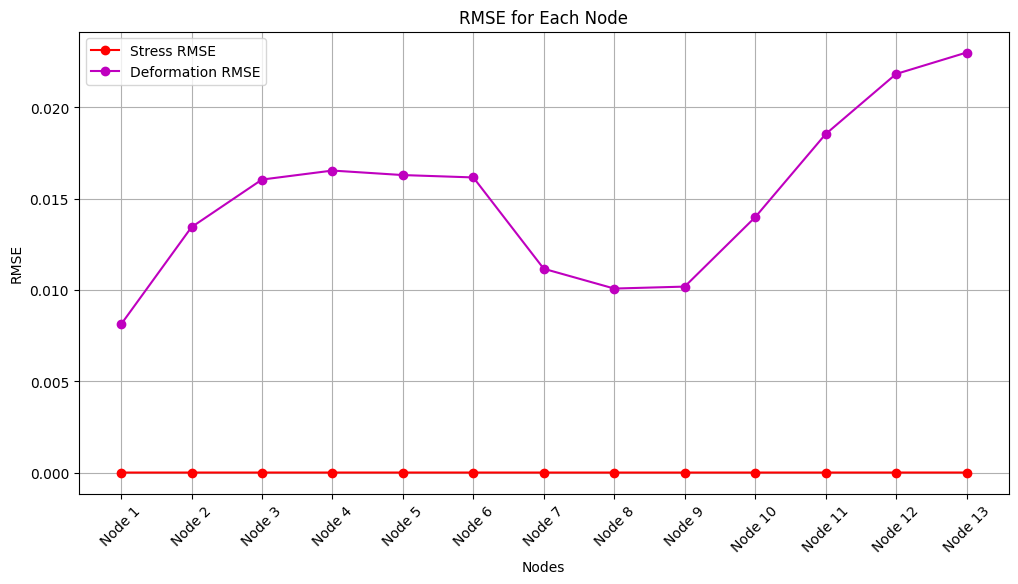

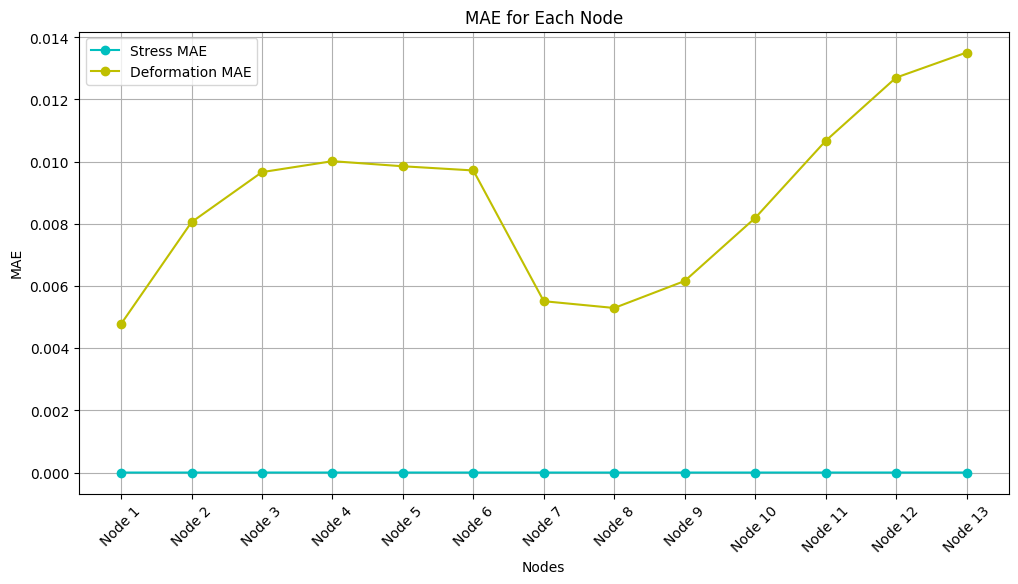

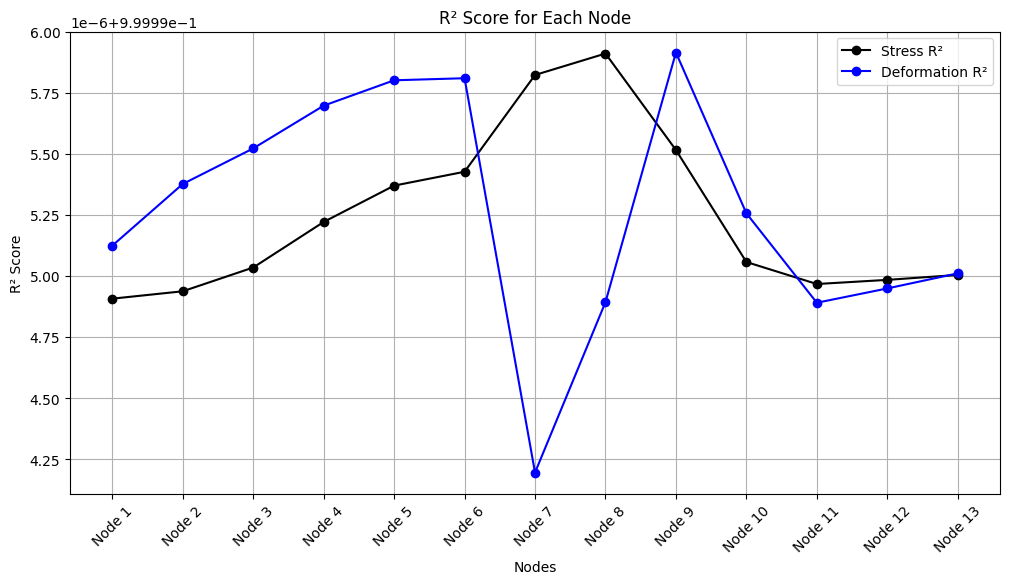

In [ ]:
import matplotlib.pyplot as plt

# Number of nodes (13 nodes)
num_nodes = 13
nodes = [f'Node {i+1}' for i in range(num_nodes)]

# Plot MSE for Stress and Deformation
plt.figure(figsize=(12, 6))
plt.plot(nodes, mse_stress_list, 'bo-', label='Stress MSE')  # Blue line with dots
plt.plot(nodes, mse_deformation_list, 'go-', label='Deformation MSE')  # Green line with dots
plt.title('MSE for Each Node')
plt.xlabel('Nodes')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE for Stress and Deformation
plt.figure(figsize=(12, 6))
plt.plot(nodes, rmse_stress_list, 'ro-', label='Stress RMSE')  # Red line with dots
plt.plot(nodes, rmse_deformation_list, 'mo-', label='Deformation RMSE')  # Magenta line with dots
plt.title('RMSE for Each Node')
plt.xlabel('Nodes')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot MAE for Stress and Deformation
plt.figure(figsize=(12, 6))
plt.plot(nodes, mae_stress_list, 'co-', label='Stress MAE')  # Cyan line with dots
plt.plot(nodes, mae_deformation_list, 'yo-', label='Deformation MAE')  # Yellow line with dots
plt.title('MAE for Each Node')
plt.xlabel('Nodes')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot R² Score for Stress and Deformation
plt.figure(figsize=(12, 6))
plt.plot(nodes, r2_stress_list, 'ko-', label='Stress R²')  # Black line with dots
plt.plot(nodes, r2_deformation_list, 'bo-', label='Deformation R²')  # Blue line with dots
plt.title('R² Score for Each Node')
plt.xlabel('Nodes')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Data Pre Processing - For the Materal Column

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Excel files
steel_data = pd.read_excel('/content/Structural_Steel.xlsx')
timber_data = pd.read_excel('/content/Timber.xlsx')

# Step 2: Add Material column
steel_data['Material'] = 'Steel'
timber_data['Material'] = 'Timber'

# Step 3: Combine the datasets
combined_data = pd.concat([steel_data, timber_data], ignore_index=True)

# Step 4: Label Encode the Material column
label_encoder = LabelEncoder()
combined_data['Material'] = label_encoder.fit_transform(combined_data['Material'])

# Step 5: Move Material column after Force column
force_index = combined_data.columns.get_loc('Force[N]')
material_column = combined_data.pop('Material')
combined_data.insert(force_index + 1, 'Material', material_column)

# Step 6: Convert all float columns to strings with a specified format for export
for col in combined_data.select_dtypes(include=['float']):
    combined_data[col] = combined_data[col].apply(lambda x: '{:.10f}'.format(x))

# Step 7: Save as an Excel file without changing original values
combined_data.to_excel('combined_data.xlsx', index=False)

# Step 8: Download the file
from google.colab import files
files.download('combined_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster  Material
0        0            9478
         1            9478
1        0           10522
         1           10521
Name: count, dtype: int64


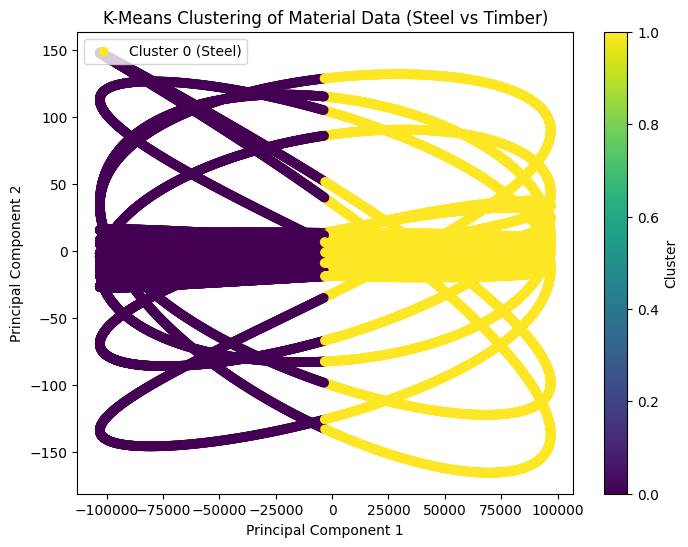

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the Excel file
combined_data = pd.read_excel('/content/FinalDataset.xlsx')


# Apply K-Means clustering (with 2 clusters for Steel and Timber)
kmeans = KMeans(n_clusters=2, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(X)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#  Map cluster labels to actual materials
# Identify which cluster corresponds to Steel and Timber by inspecting the majority material in each cluster
cluster_0_material = combined_data[combined_data['Cluster'] == 0]['Material'].mode()[0]
cluster_1_material = combined_data[combined_data['Cluster'] == 1]['Material'].mode()[0]

# Create a dictionary to map clusters to material types
cluster_to_material = {0: cluster_0_material, 1: cluster_1_material}

# # Check the distribution of materials in each cluster
cluster_materials = combined_data.groupby('Cluster')['Material'].value_counts()
print(cluster_materials)

# Plot the data with PCA projections and label clusters
plt.figure(figsize=(8, 6))

# Plot each cluster with the correct color
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=combined_data['Cluster'], cmap='viridis', label="Cluster")

# Set title and labels
plt.title('K-Means Clustering of Material Data (Steel vs Timber)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a color bar to represent the clusters
plt.colorbar(label='Cluster')

# Add a legend to explain the material mapping
# Map the clusters to actual material names
cluster_labels = [f"Cluster {label} ({'Steel' if cluster_to_material[label] == 0 else 'Timber'})"
                  for label in cluster_to_material.keys()]
plt.legend(cluster_labels, loc='upper left')

# Show the plot
plt.show()

# Save the figure for later use (optional)
plt.savefig('/content/kmeans_pca_clusters.png')


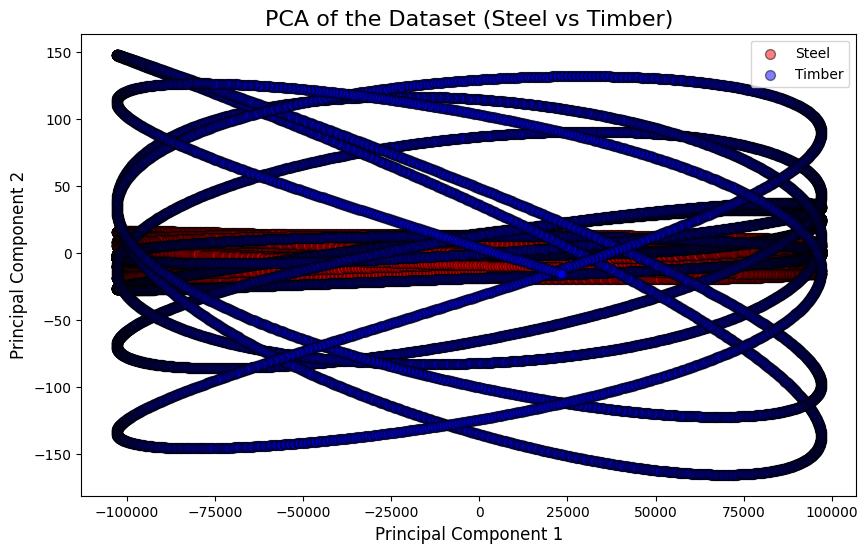

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the combined dataset (after your previous processing)
combined_data = pd.read_excel('/content/FinalDataset.xlsx')

# Step 2: Extract features (X) and target (y)
X = combined_data.drop(columns=['Material'])  # Features: everything except 'Material'
y = combined_data['Material']  # Target: Material (Steel or Timber)

# Step 3: Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Material'] = y  # Add the 'Material' column for coloring

# Step 5: Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['Material'] == 0]['PCA1'], pca_df[pca_df['Material'] == 0]['PCA2'],
            color='red', label='Steel', alpha=0.5, edgecolors='k', s=50)
plt.scatter(pca_df[pca_df['Material'] == 1]['PCA1'], pca_df[pca_df['Material'] == 1]['PCA2'],
            color='blue', label='Timber', alpha=0.5, edgecolors='k', s=50)

# Step 6: Add titles and labels
plt.title('PCA of the Dataset (Steel vs Timber)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()

# Step 7: Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


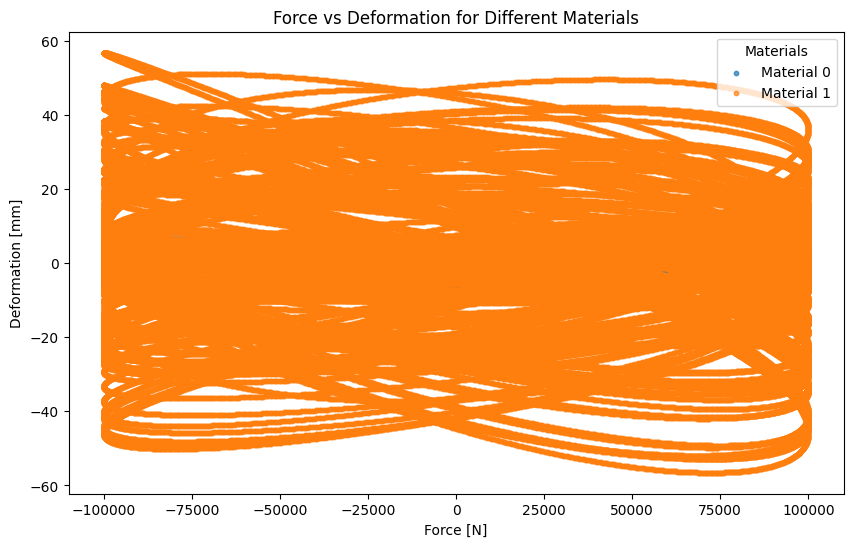

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


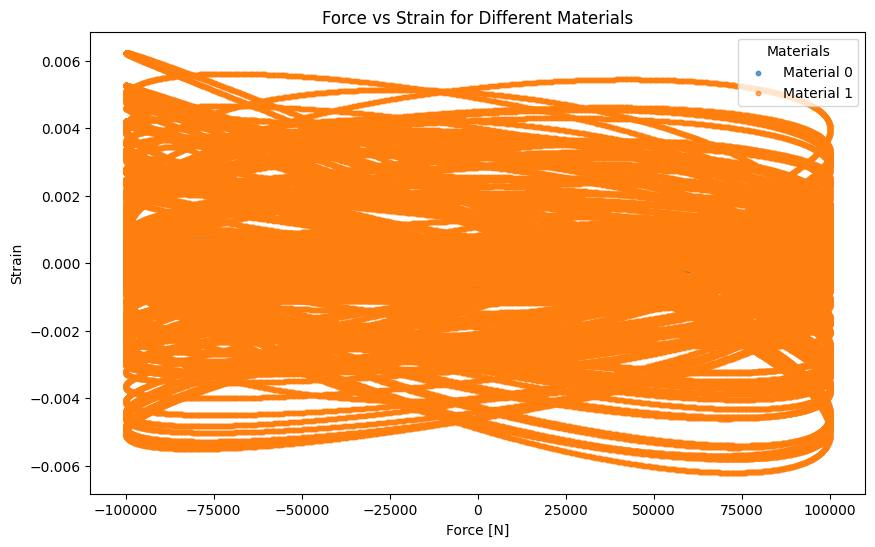

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the Excel file
combined_data = pd.read_excel('/content/FinalDataset.xlsx')

# Ensure Material column exists and is label-encoded
label_encoder = LabelEncoder()
combined_data['Material'] = label_encoder.fit_transform(combined_data['Material'])


d_columns = [f'D{i}[mm]' for i in range(2, 14)]
s_columns = [f'S{i}' for i in range(2, 14)]

reshaped_data_deformation = []
reshaped_data_strain = []

# Loop through each row in the dataset
for index, row in combined_data.iterrows():
    force_value = row['Force[N]']
    # Loop through each D and S value and add them to reshaped_data
    for d_col, s_col in zip(d_columns, s_columns):
        reshaped_data_deformation.append([force_value, row[d_col], row['Material']])
        reshaped_data_strain.append([force_value, row[s_col], row['Material']])

# Convert reshaped data to DataFrame
reshaped_df_deformation = pd.DataFrame(reshaped_data_deformation, columns=['Force', 'Deformation', 'Material'])
reshaped_df_strain = pd.DataFrame(reshaped_data_strain, columns=['Force', 'Strain', 'Material'])

# Create the plot for Force vs Deformation
plt.figure(figsize=(10, 6))

# Plot for each material type with different colors (dots only)
for material in combined_data['Material'].unique():
    material_data = reshaped_df_deformation[reshaped_df_deformation['Material'] == material]
    plt.scatter(material_data['Force'], material_data['Deformation'],
                label=f"Material {label_encoder.inverse_transform([material])[0]}",
                alpha=0.7, marker='o', s=10)  # 's=10' makes the dots smaller

# Set title and labels
plt.title('Force vs Deformation for Different Materials')
plt.xlabel('Force [N]')
plt.ylabel('Deformation [mm]')
plt.legend(title="Materials")
plt.show()

# Create the plot for Force vs Strain
plt.figure(figsize=(10, 6))

# Plot for each material type with different colors (dots only)
for material in combined_data['Material'].unique():
    material_data = reshaped_df_strain[reshaped_df_strain['Material'] == material]
    plt.scatter(material_data['Force'], material_data['Strain'],
                label=f"Material {label_encoder.inverse_transform([material])[0]}",
                alpha=0.7, marker='o', s=10)  # 's=10' makes the dots smaller

# Set title and labels
plt.title('Force vs Strain for Different Materials')
plt.xlabel('Force [N]')
plt.ylabel('Strain')
plt.legend(title="Materials")
plt.show()


Random Forest Code for the Material

Best parameters for Stress: {'max_depth': 30, 'n_estimators': 100}
Best parameters for Deformation: {'max_depth': 50, 'n_estimators': 120}
Stress Node 1 - MSE: 5.193084314001533e-12, RMSE: 2.2788339812284554e-06, MAE: 8.54823612148508e-07, R²: 0.9999908281076442
Stress Node 2 - MSE: 1.4887842187128777e-11, RMSE: 3.858476666655998e-06, MAE: 1.4473459368006548e-06, R²: 0.999990944389515
Stress Node 3 - MSE: 2.1460238905020804e-11, RMSE: 4.632519714477296e-06, MAE: 1.7447118624668897e-06, R²: 0.999991173546787
Stress Node 4 - MSE: 2.3020893579312617e-11, RMSE: 4.798009335058928e-06, MAE: 1.8189107133295857e-06, R²: 0.9999914851124153
Stress Node 5 - MSE: 2.2005838551877025e-11, RMSE: 4.691038110256303e-06, MAE: 1.794016478813852e-06, R²: 0.999991806816251
Stress Node 6 - MSE: 2.1094582707398217e-11, RMSE: 4.592883920522945e-06, MAE: 1.7701006598528563e-06, R²: 0.9999920017118024
Stress Node 7 - MSE: 6.47827713236067e-12, RMSE: 2.545245986611249e-06, MAE: 1.0107843524091568e-06, R²: 0.9999

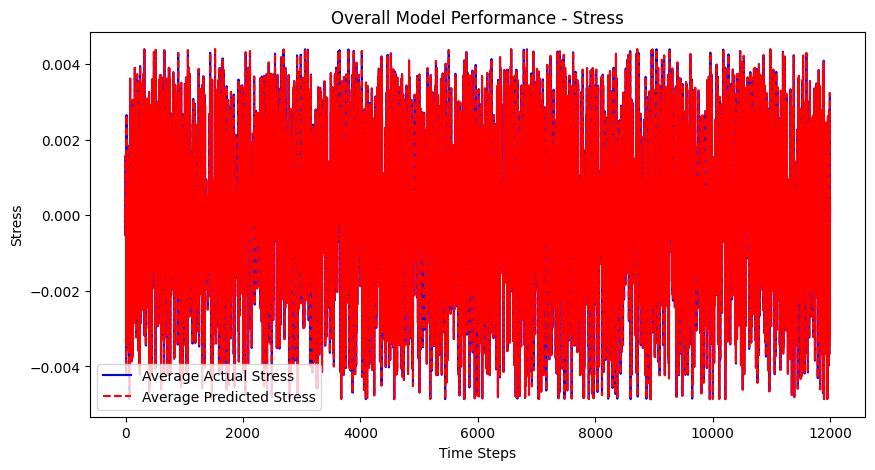

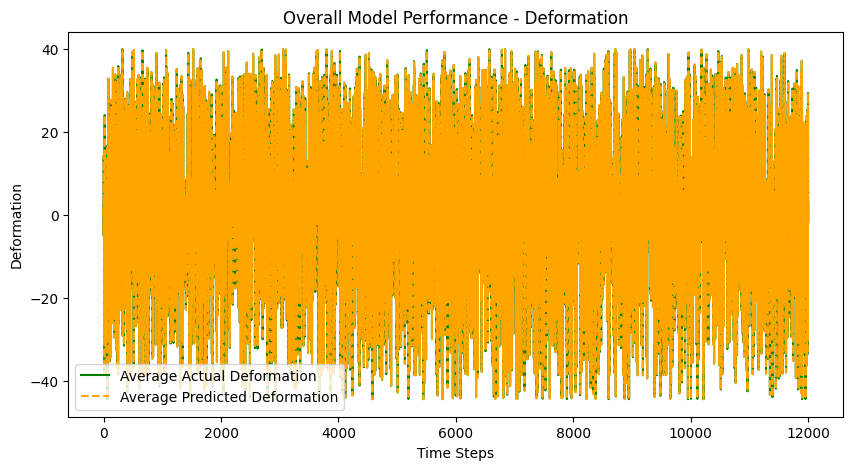

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/FinalDataset.xlsx'
data = pd.read_excel(file_path)

# Separate input features (time, force, material) and output variables
X = data[['Time[s]', 'Force[N]', 'Material']]

# Output variables: Stress (S1 to S14) and Deformation (D1 to D14)
stress_columns = [f'S{i}' for i in range(2, 15)]  # S1 to S14
deformation_columns = [f'D{i}[mm]' for i in range(2, 15)]  # D1(mm) to D14(mm)

y_stress = data[stress_columns]
y_deformation = data[deformation_columns]

# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train_stress, y_test_stress = train_test_split(X_scaled, y_stress, test_size=0.3, random_state=42)
_, _, y_train_deformation, y_test_deformation = train_test_split(X_scaled, y_deformation, test_size=0.3, random_state=42)

# Define the Random Forest Regressor model and parameters for GridSearch
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [70, 100, 120, 150],
    'max_depth': [10, 20, 30, 40, 50]
}

# Perform GridSearch to find the best parameters for stress prediction
grid_search_stress = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_stress.fit(X_train, y_train_stress)

# Perform GridSearch to find the best parameters for deformation prediction
grid_search_deformation = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_deformation.fit(X_train, y_train_deformation)

# Extract and print the best parameters for the stress model
best_params_stress = grid_search_stress.best_params_
print(f"Best parameters for Stress: {best_params_stress}")

# Extract and print the best parameters for the deformation model
best_params_deformation = grid_search_deformation.best_params_
print(f"Best parameters for Deformation: {best_params_deformation}")

# Train models with the best parameters
rf_best_stress = RandomForestRegressor(n_estimators=best_params_stress['n_estimators'], max_depth=best_params_stress['max_depth'])
rf_best_stress.fit(X_train, y_train_stress)

rf_best_deformation = RandomForestRegressor(n_estimators=best_params_deformation['n_estimators'], max_depth=best_params_deformation['max_depth'])
rf_best_deformation.fit(X_train, y_train_deformation)

# Make predictions on the test set
y_pred_stress = rf_best_stress.predict(X_test)
y_pred_deformation = rf_best_deformation.predict(X_test)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Stress performance metrics for each node
for i in range(13):
    mse_stress, rmse_stress, mae_stress, r2_stress = evaluate_model(y_test_stress.iloc[:, i], y_pred_stress[:, i])
    print(f'Stress Node {i+1} - MSE: {mse_stress}, RMSE: {rmse_stress}, MAE: {mae_stress}, R²: {r2_stress}')

# Deformation performance metrics for each node
for i in range(13):
    mse_deformation, rmse_deformation, mae_deformation, r2_deformation = evaluate_model(y_test_deformation.iloc[:, i], y_pred_deformation[:, i])
    print(f'Deformation Node {i+1} - MSE: {mse_deformation}, RMSE: {rmse_deformation}, MAE: {mae_deformation}, R²: {r2_deformation}')

# Plot for Overall Stress Performance
avg_actual_stress = np.mean(y_test_stress.values, axis=1)
avg_predicted_stress = np.mean(y_pred_stress, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(avg_actual_stress, label='Average Actual Stress', color='blue')
plt.plot(avg_predicted_stress, label='Average Predicted Stress', color='red', linestyle='dashed')
plt.title('Overall Model Performance - Stress')
plt.xlabel('Time Steps')
plt.ylabel('Stress')
plt.legend()
plt.show()

# Plot for Overall Deformation Performance
avg_actual_deformation = np.mean(y_test_deformation.values, axis=1)
avg_predicted_deformation = np.mean(y_pred_deformation, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(avg_actual_deformation, label='Average Actual Deformation', color='green')
plt.plot(avg_predicted_deformation, label='Average Predicted Deformation', color='orange', linestyle='dashed')
plt.title('Overall Model Performance - Deformation')
plt.xlabel('Time Steps')
plt.ylabel('Deformation')
plt.legend()
plt.show()
